# Classifying on real data


In [29]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns
from master_scripts.data_functions import *
from master_scripts.analysis_functions import *
from master_scripts.plotting import plot_event
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data import

In [2]:
repo_root = get_git_root()
DATA_PATH = "../../data/real/anodedata_500k.txt"
DATA_FILENAME = "anodedata_500k.txt"
MODEL_PATH = "../../models/"
RESULTS_PATH = "../../results/"
CLASSIFIER = "4557cfeefc83.h5"


In [3]:
# Load experiment and associated model (must be a saved model instance complete with weights)
experiment_id = "4557cfeefc83"
experiment = load_experiment(experiment_id)
model = tf.keras.models.load_model(repo_root + "models/" + experiment_id + ".h5")
# Print experiment metrics
print("==== Experiment metrics")
print(json.dumps(experiment["metrics"], indent=2))
print("====")

==== Experiment metrics
{
  "accuracy_score": 0.9782421052631579,
  "confusion_matrix": {
    "TN": 236943,
    "FP": 589,
    "FN": 9746,
    "TP": 227722
  },
  "f1_score": 0.9778113654759016,
  "matthews_corrcoef": 0.9571957148197215,
  "roc_auc_score": 0.9924280110669701
}
====


In [9]:
events, images = import_real_data(DATA_PATH) # images not normalized
images = normalize_image_data(images)

# load classification results (doesn't contain images)
with open(RESULTS_PATH + "events_classified_" + DATA_FILENAME[:-4] + "_" + CLASSIFIER[:-3] + ".json") as fp:
    events = json.load(fp)


In [11]:
descriptors = list([event['event_descriptor'] for event in events.values()])
print(descriptors.count(16))

17


# Results
## Plots
### Histogram of descriptor vs predicted class

## Preliminary results on anodedata_short.txt
|Event descriptor | Event type                   | singles | doubles |
| :---           |  :---:                       | :---:   | :---:   |
|        1        |           Implant            |  1743   |  87974  |
|        2        |            Decay             | 260147  |    0    |
|        4        |          Light ion           |  20537  | 128963  |
|        9        |   Implant + Double (time)    |    1    |    0    |
|       10        |    Decay + Double (time)     |   614   |    0    |
|       12        |  Light ion + Double (time)   |    3    |    0    |
|       16        |        Double (space)        |   11    |    6    |

## Results 05/08/20 anodedata_500k.txt (4557cfeefc83)
|Event descriptor | Event type                   | singles | doubles |
| :---           |  :---:                       | :---:   | :---:   |
|        1        |           Implant            |   904   |  88813  |
|        2        |            Decay             |  48613  | 211534  |
|        4        |          Light ion           |  3020   | 146480  |
|        9        |   Implant + Double (time)    |    0    |    1    |
|       10        |    Decay + Double (time)     |   206   |   408   |
|       12        |  Light ion + Double (time)   |    1    |    2    |
|       16        |        Double (space)        |    0    |   17    |

## Results 16/08/20 anodedata_500k.txt (9886d077068a)
|Event descriptor | Event type                   | singles | doubles |
| :---           |  :---:                       | :---:   | :---:   |
|        1        |           Implant            |   572   |  89145  |
|        2        |            Decay             |  39274  | 220873  |
|        4        |          Light ion           |  2411   | 147089  |
|        9        |   Implant + Double (time)    |    0    |    1    |
|       10        |    Decay + Double (time)     |   172   |   442   |
|       12        |  Light ion + Double (time)   |    0    |    3    |
|       16        |        Double (space)        |    0    |   17    |

In [6]:
# Extract doubles
doubles = []
ion_double_t = []
for event_id, event in events.items():
    if event['event_descriptor'] == 16:
        doubles.append(event_id)
    if event['event_descriptor'] == 12:
        ion_double_t.append(event_id)

In [13]:
print(len(doubles))

17


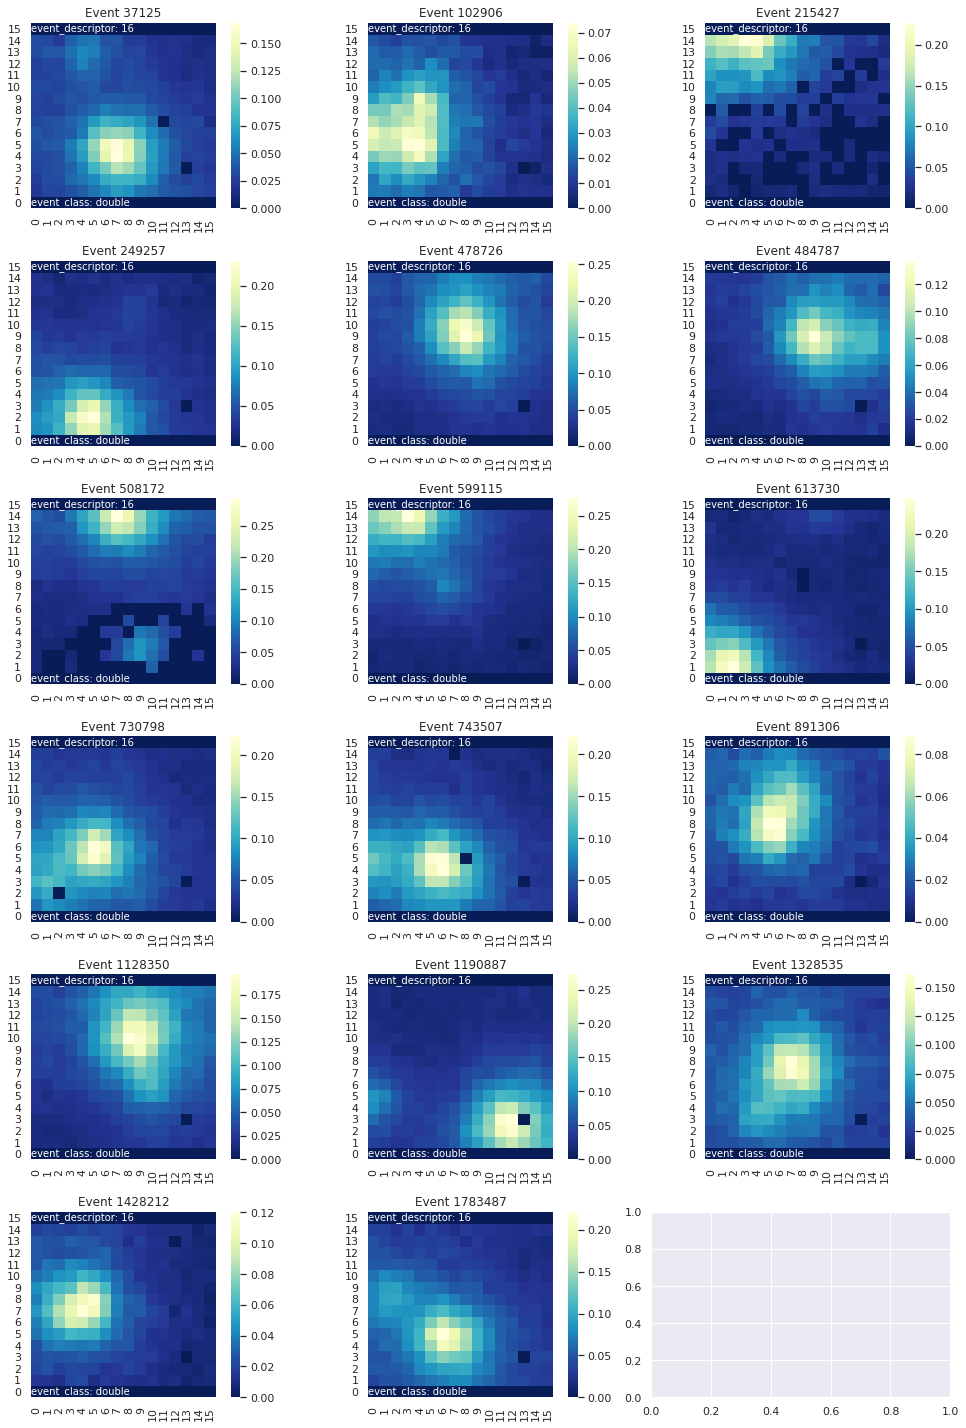

In [10]:
# Plot the doubles and event_class from model
fig, axes = plt.subplots(6,3, figsize=(14,20), tight_layout=True)
idx = 0
for row in axes:
    for ax_col in row:
        if idx >= len(doubles):
            break
        curr_event = events[doubles[idx]]
        plot_event(curr_event, doubles[idx], images[curr_event['image_idx']], ax_col)
        idx += 1
#fig.savefig("test.pdf")
    
    

## Plot doubles in time

In [ ]:
# Light ions + double (time)
fig, axes = plt.subplots(2, 3, figsize=(12, 6), tight_layout=True)
idx = 0
for row in axes:
    for ax_col in row:
        if idx >= len(ion_double_t):
            break
        curr_event = events[ion_double_t[idx]]
        plot_event(curr_event, ion_double_t[idx], images[curr_event['image_idx']], ax_col)
        idx += 1
#fig.savefig("test.pdf")


# Compare two models

In [ ]:
id1 = "4557cfeefc83"
id2 = "9886d077068a"
ex1 = load_experiment(id1)
ex2 = load_experiment(id2)
model1 = tf.keras.models.load_model(repo_root + "models/" + id1 + ".h5")
model2 = tf.keras.models.load_model(repo_root + "models/" + id2 + ".h5")

In [34]:
# Print experiment metrics
print("==== Experiment metrics for {}".format(id1))
print(json.dumps(ex1["metrics"], indent=2))
print("====")
print("==== Experiment metrics for {}".format(id2))
print(json.dumps(ex2["metrics"], indent=2))
print("====")


==== Experiment metrics for 4557cfeefc83
{
  "accuracy_score": 0.9782421052631579,
  "confusion_matrix": {
    "TN": 236943,
    "FP": 589,
    "FN": 9746,
    "TP": 227722
  },
  "f1_score": 0.9778113654759016,
  "matthews_corrcoef": 0.9571957148197215,
  "roc_auc_score": 0.9924280110669701
}
====
==== Experiment metrics for 9886d077068a
{
  "accuracy_score": 0.9832926315789474,
  "confusion_matrix": {
    "TN": 236349,
    "FP": 1183,
    "FN": 6753,
    "TP": 230715
  },
  "f1_score": 0.9830920859201562,
  "matthews_corrcoef": 0.9668510918102141,
  "roc_auc_score": 0.9928096454052002
}
====


In [37]:
# Print classification results
events1 = anodedata_classification_table(id1, "anodedata_500k")
events2 = anodedata_classification_table(id2, "anodedata_500k")

Classification results for 4557cfeefc83:
|Event descriptor | Event type                   | singles | doubles |
| :---            |  :---:                       | :---:   | :---:   |
|        1        |           Implant            |   904   |  88813  |
|        2        |            Decay             |  48613  | 211534  |
|        4        |          Light ion           |  3020   | 146480  |
|        9        |   Implant + Double (time)    |    0    |    1    |
|       10        |    Decay + Double (time)     |   206   |   408   |
|       12        |  Light ion + Double (time)   |    1    |    2    |
|       16        |        Double (space)        |    0    |   17    |
Classification results for 9886d077068a:
|Event descriptor | Event type                   | singles | doubles |
| :---            |  :---:                       | :---:   | :---:   |
|        1        |           Implant            |   572   |  89145  |
|        2        |            Decay             |  39274  | 22087

In [38]:
# Load default events and images
images = import_real_data(DATA_PATH, return_events=False) # images not normalized
#images = normalize_image_data(images)

In [31]:
# Get events that are not classified equally.
mismatch = [k for k in events1.keys() if events1[k]['event_class'] != events2[k]['event_class']]

single double


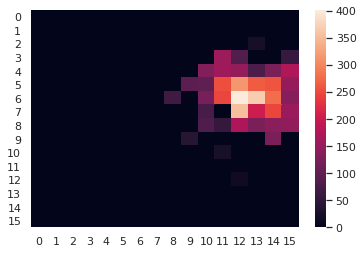

In [27]:
sns.heatmap(images[events1[mismatch[0]]['image_idx']].reshape(16,16))
print(events1[mismatch[0]]['event_class'], events2[mismatch[0]]['event_class'])